<a href="https://colab.research.google.com/github/vivek-c29/Vivek_S4DS-TASK/blob/main/ML_miniProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Black Friday Sales Dataset
### Data PreProcessing

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#### Importing datasets

In [ ]:
train_df = pd.read_csv(r"/content/drive/MyDrive/Datasets/BF_train.csv")
test_df = pd.read_csv(r"/content/drive/MyDrive/Datasets/BF_test.csv")
train_df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [ ]:
train_df.shape

(550068, 12)

In [ ]:
test_df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


#### Merging both test and train data

In [ ]:
df = pd.concat([train_df,test_df],ignore_index=True)

In [ ]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [ ]:
df.tail()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
783662,1006036,P00118942,F,26-35,15,B,4+,1,8,NaN,NaN,NaN
783663,1006036,P00254642,F,26-35,15,B,4+,1,5,8.0,NaN,NaN
783664,1006036,P00031842,F,26-35,15,B,4+,1,1,5.0,12.0,NaN
783665,1006037,P00124742,F,46-50,1,C,4+,0,10,16.0,NaN,NaN
783666,1006039,P00316642,F,46-50,0,B,4+,1,4,5.0,NaN,NaN


In [ ]:

print(train_df.shape,test_df.shape,df.shape)

(550068, 12) (233599, 11) (783667, 12)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783667 entries, 0 to 783666
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          537685 non-null  float64
 10  Product_Category_3          237858 non-null  float64
 11  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 71.7+ MB


In [ ]:
df.describe()

#### Dropping the user ID and Product ID column as it is merely a unique identifier representing each user and does not contribute meaningful information for modeling.

In [ ]:
df.drop('User_ID',axis=1,inplace=True)
df.drop('Product_ID',axis=1,inplace=True)


In [ ]:
df.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


#### Handling categorical features i.e Gender, Age, City_Category

In [ ]:
df['Gender'].value_counts()

,count
Gender,
M,590031
F,193636


#### Mapping Female as 0 and Male as 1


In [ ]:
df['Gender'] = df['Gender'].map({'F':0,'M':1})

In [ ]:
df['Gender'].value_counts()

,count
Gender,
1,590031
0,193636


#### Handling age column

In [ ]:
df['Age'].value_counts()

,count
Age,
26-35,313015
36-45,156724
18-25,141953
46-50,65278
51-55,54784
55+,30579
0-17,21334


### Mapping each age category as follows :
### 0-17 => 1, 18-25 => 2,26-35 => 3, 36-45 => 4, 46-50 => 5, 51-55 => 6, 55+ => 7

In [ ]:
df['Age'] = df['Age'].map({'0-17':1,'18-25':2,'26-35':3,'36-45':4,'46-50':5,'51-55':6,'55+':7})

In [ ]:
df.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,1,10,A,2,0,3,NaN,NaN,8370.0
1,0,1,10,A,2,0,1,6.0,14.0,15200.0
2,0,1,10,A,2,0,12,NaN,NaN,1422.0
3,0,1,10,A,2,0,12,14.0,NaN,1057.0
4,1,7,16,C,4+,0,8,NaN,NaN,7969.0


In [ ]:
df['Age'].value_counts()

,count
Age,
3,313015
4,156724
2,141953
5,65278
6,54784
7,30579
1,21334


#### Handling City_Category feature

In [ ]:
df['City_Category'].value_counts()

,count
City_Category,
B,329739
C,243684
A,210244


In [ ]:
df_city = pd.get_dummies(df['City_Category'],dtype='int',drop_first=True)

In [ ]:
df_city.head()

,B,C
0,0,0
1,0,0
2,0,0
3,0,0
4,0,1


In [ ]:
df = pd.concat([df,df_city],axis=1)
df.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,0,1,10,A,2,0,3,NaN,NaN,8370.0,0,0
1,0,1,10,A,2,0,1,6.0,14.0,15200.0,0,0
2,0,1,10,A,2,0,12,NaN,NaN,1422.0,0,0
3,0,1,10,A,2,0,12,14.0,NaN,1057.0,0,0
4,1,7,16,C,4+,0,8,NaN,NaN,7969.0,0,1


In [ ]:
df.drop('City_Category',axis=1,inplace=True)

In [ ]:
df.head()

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,0,1,10,2,0,3,NaN,NaN,8370.0,0,0
1,0,1,10,2,0,1,6.0,14.0,15200.0,0,0
2,0,1,10,2,0,12,NaN,NaN,1422.0,0,0
3,0,1,10,2,0,12,14.0,NaN,1057.0,0,0
4,1,7,16,4+,0,8,NaN,NaN,7969.0,0,1


In [ ]:
df.isna().sum()

,0
Gender,0
Age,0
Occupation,0
Stay_In_Current_City_Years,0
Marital_Status,0
Product_Category_1,0
Product_Category_2,245982
Product_Category_3,545809
Purchase,233599
B,0


### Here are the following features having Missing (NA) values
#### Among these Purschase is basically the test data whichever which we had merged in the dataset
#### Product_Category2 and Product_Category3 actually has major missing values

In [ ]:
df['Product_Category_2'].unique()

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [ ]:
df['Product_Category_2'].value_counts()

,count
Product_Category_2,
8.0,91317
14.0,78834
2.0,70498
16.0,61687
15.0,54114
5.0,37165
4.0,36705
6.0,23575
11.0,20230


In [ ]:

df['Product_Category_3'].nunique()

15

In [ ]:
df['Product_Category_3'].value_counts()

,count
Product_Category_3,
16.0,46469
15.0,39968
14.0,26283
17.0,23818
5.0,23799
8.0,17861
9.0,16532
12.0,13115
13.0,7849


#### Since the values of these 2 columns are of categorical type, therefore we will replace missing values with median value of that particular column

In [ ]:
df['Product_Category_2'].fillna(df['Product_Category_2'].median(),inplace=True)

<ipython-input-31-9fd485357503>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Product_Category_2'].fillna(df['Product_Category_2'].median(),inplace=True)


### Their are majority of the values are missing in Product Category3 column therefore we will drop

In [ ]:
df = df.drop('Product_Category_3',axis=1)

In [ ]:
df.isna().sum()

,0
Gender,0
Age,0
Occupation,0
Stay_In_Current_City_Years,0
Marital_Status,0
Product_Category_1,0
Product_Category_2,0
Purchase,233599
B,0
C,0


In [ ]:
df.head()

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase,B,C
0,0,1,10,2,0,3,9.0,8370.0,0,0
1,0,1,10,2,0,1,6.0,15200.0,0,0
2,0,1,10,2,0,12,9.0,1422.0,0,0
3,0,1,10,2,0,12,14.0,1057.0,0,0
4,1,7,16,4+,0,8,9.0,7969.0,0,1


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783667 entries, 0 to 783666
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Gender                      783667 non-null  int64  
 1   Age                         783667 non-null  int64  
 2   Occupation                  783667 non-null  int64  
 3   Stay_In_Current_City_Years  783667 non-null  object 
 4   Marital_Status              783667 non-null  int64  
 5   Product_Category_1          783667 non-null  int64  
 6   Product_Category_2          783667 non-null  float64
 7   Purchase                    550068 non-null  float64
 8   B                           783667 non-null  int64  
 9   C                           783667 non-null  int64  
dtypes: float64(2), int64(7), object(1)
memory usage: 59.8+ MB


#### Now, Stay_In_Current_City_Years  features is also of object type.Therefore we need to handle that also.

In [ ]:
df['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [ ]:
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].str.replace('+','')

In [ ]:
df['Stay_In_Current_City_Years'].unique()

array(['2', '4', '3', '1', '0'], dtype=object)

#### Converting dtype of this features from object to int

In [ ]:
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].astype('int64')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783667 entries, 0 to 783666
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Gender                      783667 non-null  int64  
 1   Age                         783667 non-null  int64  
 2   Occupation                  783667 non-null  int64  
 3   Stay_In_Current_City_Years  783667 non-null  int64  
 4   Marital_Status              783667 non-null  int64  
 5   Product_Category_1          783667 non-null  int64  
 6   Product_Category_2          783667 non-null  float64
 7   Purchase                    550068 non-null  float64
 8   B                           783667 non-null  int64  
 9   C                           783667 non-null  int64  
dtypes: float64(2), int64(8)
memory usage: 59.8 MB


In [ ]:
# sns.pairplot(df)

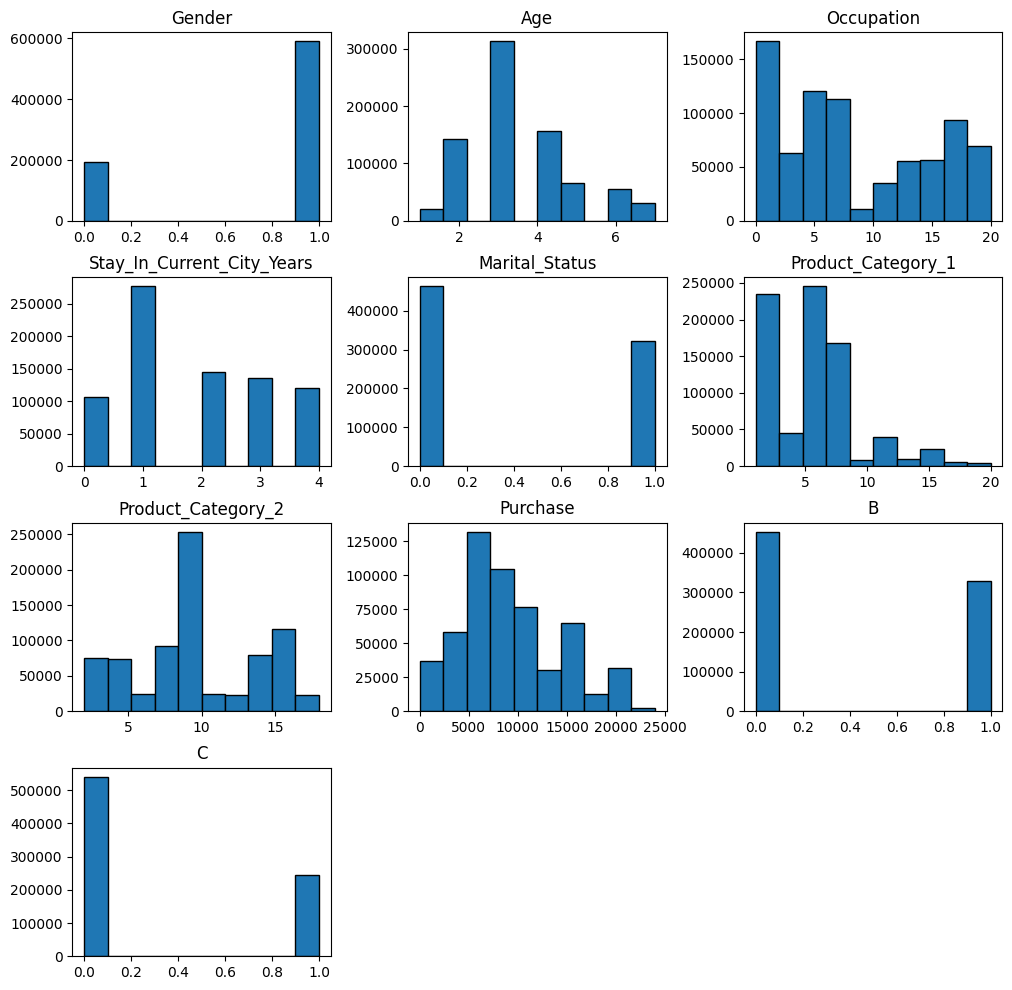

In [ ]:
df.hist(edgecolor='black',figsize=(12,12),grid=False);

### This above graphs helps us to visualize the frequency count of each features.

<Axes: ylabel='Product_Category_1'>

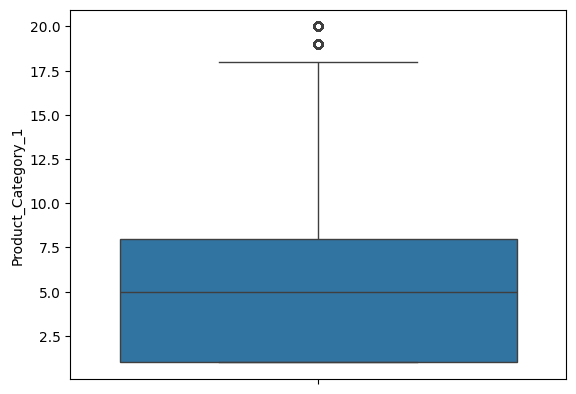

In [ ]:
sns.boxplot(df['Product_Category_1'])

<Axes: ylabel='Product_Category_2'>

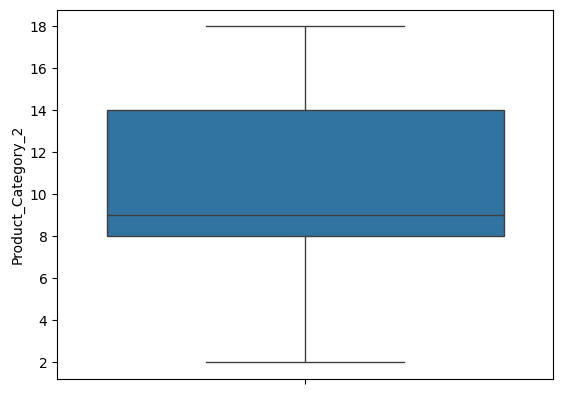

In [ ]:
sns.boxplot(df['Product_Category_2'])

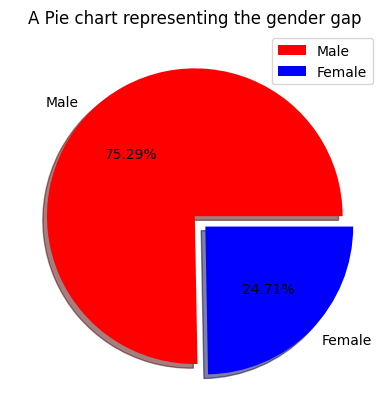

In [ ]:
plt.pie(df['Gender'].value_counts(),labels=['Male','Female'],shadow=True,colors = ['red', 'blue'],autopct = '%.2f%%',explode=[0,0.1])
plt.legend()
plt.title("A Pie chart representing the gender gap")
plt.show()

<Axes: xlabel='Age', ylabel='Purchase'>

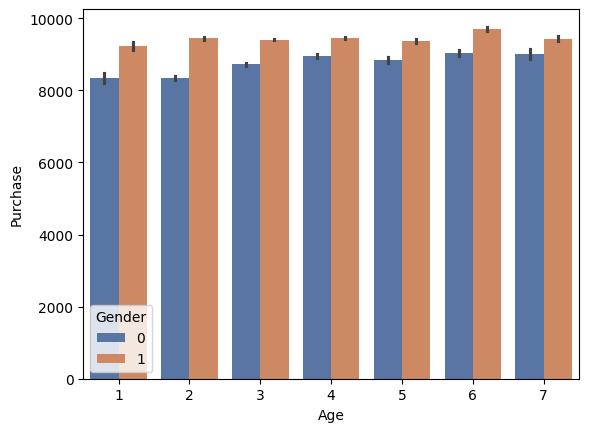

In [ ]:
sns.barplot(data=df,x='Age',y='Purchase',hue='Gender',palette='deep')

### This denotes that Male has more purchase amount over female

<Axes: xlabel='Occupation', ylabel='Purchase'>

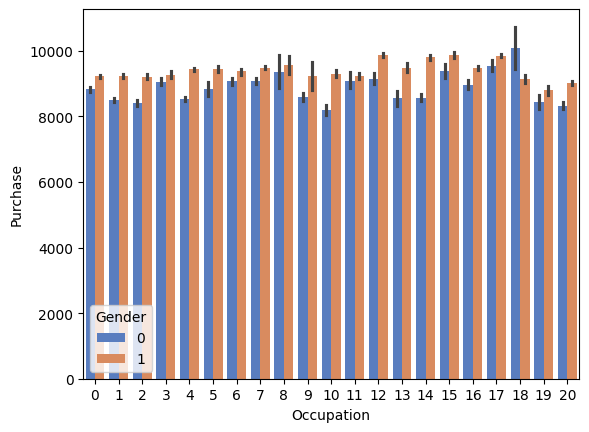

In [ ]:
sns.barplot(data=df,x='Occupation',y='Purchase',hue='Gender',palette='muted')

<Axes: xlabel='Product_Category_1', ylabel='Purchase'>

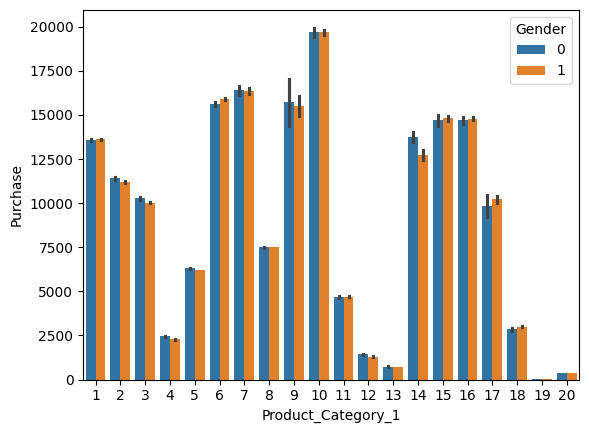

In [ ]:
sns.barplot(data=df,x='Product_Category_1',y='Purchase',hue='Gender')

#### This graph visualizes that almost for all categories for product1, men and women have same amount of purchase.
#### And also for product category number 10 has the highest purchase among all the other and it is around 19,000.

<Axes: xlabel='Product_Category_2', ylabel='Purchase'>

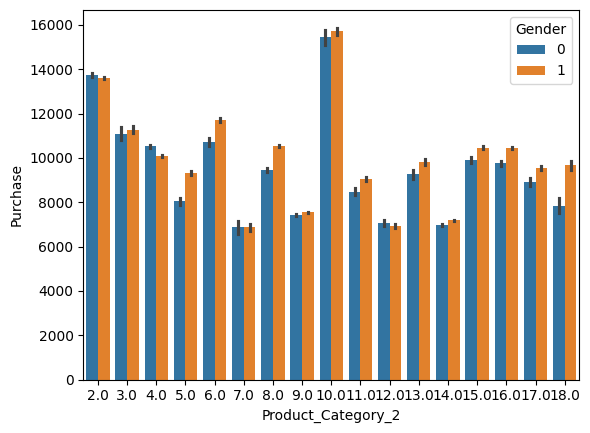

In [ ]:
sns.barplot(data=df,x='Product_Category_2',y='Purchase',hue='Gender')

#### This graph visulaizes that product category number 10 has the highest purchase amount around 15,500 among all the other categories.

In [ ]:
sns.countplot(df['Occupation'],palette = "muted")
plt.title("Distribution of Occupation across customers")
plt.xlabel("Occupation")
plt.ylabel("Count")
plt.show()

<ipython-input-51-2420e3459d5e>:1: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




KeyboardInterrupt: 

In [ ]:
# sns.countplot(df['Age'])

In [ ]:
df_test = df[df['Purchase'].isna()]

NameError: name 'df' is not defined

In [ ]:
df_test.head()

In [ ]:
df_train = df[~df['Purchase'].isna()]

In [ ]:
df_train.head()

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase,B,C
0,0,1,10,2,0,3,9.0,8370.0,0,0
1,0,1,10,2,0,1,6.0,15200.0,0,0
2,0,1,10,2,0,12,9.0,1422.0,0,0
3,0,1,10,2,0,12,14.0,1057.0,0,0
4,1,7,16,4,0,8,9.0,7969.0,0,1


In [ ]:
X= df_train.drop('Purchase',axis=1)
y = df_train.loc[:,'Purchase']

In [ ]:
X

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,B,C
0,0,1,10,2,0,3,9.0,0,0
1,0,1,10,2,0,1,6.0,0,0
2,0,1,10,2,0,12,9.0,0,0
3,0,1,10,2,0,12,14.0,0,0
4,1,7,16,4,0,8,9.0,0,1
...,...,...,...,...,...,...,...,...,...
550063,1,6,13,1,1,20,9.0,1,0
550064,0,3,1,3,0,20,9.0,0,1
550065,0,3,15,4,1,20,9.0,1,0
550066,0,7,1,2,0,20,9.0,0,1


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_val,y_train,y_val = train_test_split(X,y,test_size=0.2,random_state=42)

### Feature Scaling and standardizing

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

# Model Training

### Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,r2_score,mean_squared_error

lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred_val = lr.predict(X_val)
y_pred_train = lr.predict(X_train)
print(f"Training R2 score : {r2_score(y_train,y_pred_train)}")
print(f"Testing R2 score : {r2_score(y_val,y_pred_val)}")
print(f"MSE Score : {mean_squared_error(y_val,y_pred_val)}")

Training R2 score : 0.1270140281052753
Testing R2 score : 0.1261317015195762
MSE Score : 21956972.115782008


In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lr, X_train, y_train, cv=5, scoring='r2')

print("R2 scores on each fold:", scores)
print("Average R2 score:", scores.mean())

R2 scores on each fold: [0.1228952  0.12691263 0.12806903 0.13035994 0.12661386]
Average R2 score: 0.12697013285451184


### Linear Regression using Grid Search CV

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

lr_model = LinearRegression()
lr_params = {'fit_intercept': [True, False], 'normalize': [True, False]}

grid_lr = GridSearchCV(lr_model, lr_params, cv=5, scoring='r2')
grid_lr.fit(X_train, y_train)

print("Best LinearRegression params:", grid_lr.best_params_)
print("Best CV R2 score (LR):", grid_lr.best_score_)

ValueError: Invalid parameter 'normalize' for estimator LinearRegression(). Valid parameters are: ['copy_X', 'fit_intercept', 'n_jobs', 'positive'].

In [ ]:
from sklearn.metrics import r2_score

y_pred_lr = grid_lr.predict(X_val)

print("Validation R2 (LR):", r2_score(y_val, y_pred_lr))

### Decision Tree Regressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

dt = DecisionTreeRegressor()
dt.fit(X_train,y_train)
y_pred_val = dt.predict(X_val)
y_pred_train = dt.predict(X_train)
print(f"Training R2 score : {r2_score(y_train,y_pred_train)}")
print(f"Testing R2 score : {r2_score(y_val,y_pred_val)}")
print(f"MSE Score : {mean_squared_error(y_val,y_pred_val)}")


Training R2 score : 0.7477154284705891
Testing R2 score : 0.6024577016960468
MSE Score : 9988719.32290302


### Random Forest Regressor

In [114]:
rf = RandomForestRegressor()
rf.fit(X_train,y_train)
y_pred_val = rf.predict(X_val)
y_pred_train = rf.predict(X_train)
print(f"Training R2 score : {r2_score(y_train,y_pred_train)}")
print(f"Testing R2 score : {r2_score(y_val,y_pred_val)}")

Training R2 score : 0.7428063884300963
Testing R2 score : 0.6350423414930282


In [ ]:
scores = cross_val_score(rf, X_train, y_train, cv=5, scoring='r2')

print("R2 scores on each fold:", scores)
print("Average R2 score:", scores.mean())

R2 scores on each fold: [0.63718696 0.63773281 0.63820911 0.63605144 0.64314783]
Average R2 score: 0.6384656302710698


### Random Forest Regressor using Grid Search CV

In [ ]:
rf_model = RandomForestRegressor(random_state=42)
rf_params = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5]
}

grid_rf = GridSearchCV(rf_model, rf_params, cv=5, scoring='r2', n_jobs=-1)
grid_rf.fit(X_train, y_train)

print("Best RandomForest params:", grid_rf.best_params_)
print("Best CV R2 score (RF):", grid_rf.best_score_)

Best RandomForest params: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 200}
Best CV R2 score (RF): 0.6530027862462521


In [ ]:
y_pred_rf = grid_rf.predict(X_val)

print("Validation R2 (RF):", r2_score(y_val, y_pred_rf))

Validation R2 (RF): 0.6451727480514181


In [ ]:
rf.feature_importances_

array([0.01060096, 0.02843652, 0.04748008, 0.0340329 , 0.01286281,
       0.82722133, 0.02834457, 0.00608803, 0.00493281])